In [1]:
import numpy as np
import pylab as pl
%pylab inline

np.random.seed(12)

def line (x, pars, err=True):
    if not err:
        e = np.zeros_like(x)
    else:
        e = np.random.randn(len(x)) * np.mean(x)
    return x*pars[0] + pars[1] + e, e



Populating the interactive namespace from numpy and matplotlib


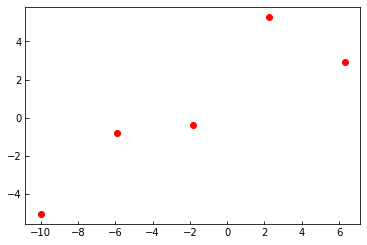

In [2]:
pars = (.52, 1)
x = np.linspace(-10, 10, 50).astype(float)
y, e = line(x[::10], pars)
pl.plot(x[::10], y, 'ro')


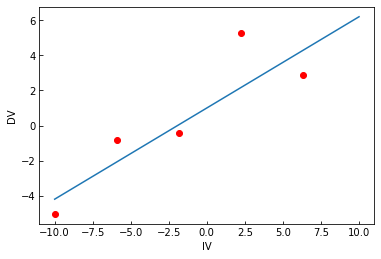

In [3]:

pl.plot(x[::10], y, 'ro')

pl.xlabel('IV')
pl.ylabel('DV')

pl.plot(x, line(x, pars, err=False)[0])

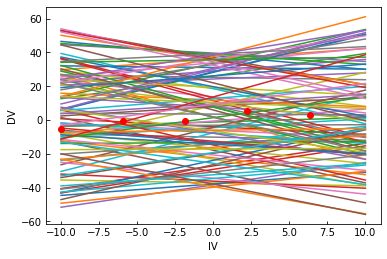

In [4]:
for i in range(100):
    pars = (5*(np.random.rand()-0.50), 80*(np.random.rand()-0.5))
    pl.plot(x, line(x, pars, err=False)[0])
pl.xlabel('IV')
pl.ylabel('DV')

pl.plot(x[::10], y, 'ro')


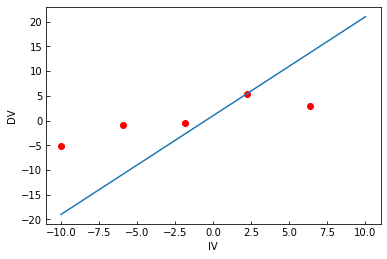

In [5]:
pl.plot(x[::10], y, 'ro')

pl.xlabel('IV')
pl.ylabel('DV')
pars = (2,1)
pl.plot(x, line(x, pars, err=False)[0])

In [6]:
import statsmodels.formula.api as sm
import pandas as pd

In [7]:
a = pd.DataFrame()
a['X'] = x[::10]
a['Y'] = y
print (a)

aall = pd.DataFrame()
aall['X'] = x


           X         Y
0 -10.000000 -5.068749
1  -5.918367 -0.825952
2  -1.836735 -0.400399
3   2.244898  5.291147
4   6.326531  2.906472


In [8]:
reg0 = sm.ols(formula='y ~ X', data = a).fit()
reg0.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     10.78
Date:                Tue, 11 Oct 2016   Prob (F-statistic):             0.0463
Time:                        11:25:42   Log-Likelihood:                -9.5884
No. Observations:                   5   AIC:                             23.18
Df Residuals:                       3   BIC:                             22.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3735      0.998      1.377      0.262        -1.801     4.549
X              0.5407      0.165      3.283      0.046         0.017     1.065
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.991
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.526
Skew:                           0.558   Prob(JB):                        0.769
Kurtosis:                       1.868   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

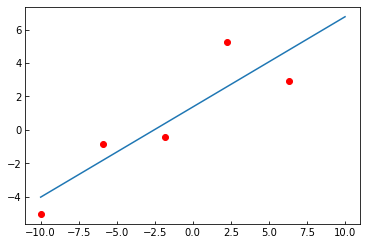

In [9]:
pl.plot(a.X, a.Y, 'ro')
pl.plot(aall.X, reg0.predict(aall))

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     5.919
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.145
Time:                        11:25:43   Log-Likelihood:                -8.5637
No. Observations:                   5   AIC:                             23.13
Df Residuals:                       2   BIC:                             21.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3993      1.425      1.684      0.234        -3.730     8.528
X              0.4148      0.206      2.009      0.182        -0.474     1.303
X2            -0.0343      0.034     -1.007      0.420        -0.181     0.112
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.376
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.182
Skew:                           0.188   Prob(JB):                        0.913
Kurtosis:                       2.143   Cond. No.                         76.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

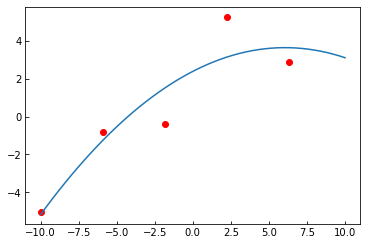

In [10]:
a['X2'] = a.X**2
aall['X2'] = aall.X**2
reg1 = sm.ols(formula='y ~ X + X2', data = a).fit()
pl.plot(a.X, a.Y, 'ro')
pl.plot(aall.X, reg1.predict(aall))
reg1.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     2.555
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.424
Time:                        11:25:43   Log-Likelihood:                -8.0008
No. Observations:                   5   AIC:                             24.00
Df Residuals:                       1   BIC:                             22.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9099      2.067      1.408      0.393       -23.356    29.176
X              0.6576      0.549      1.198      0.443        -6.320     7.636
X2            -0.0630      0.072     -0.880      0.541        -0.973     0.847
X3            -0.0052      0.010     -0.502      0.704        -0.137     0.127
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.571
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.375
Skew:                          -0.344   Prob(JB):                        0.829
Kurtosis:                       1.847   Cond. No.                         818.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

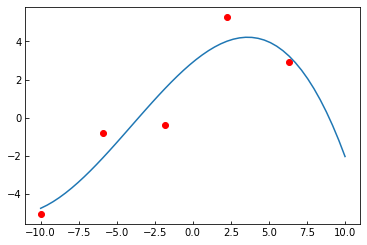

In [11]:
a['X3'] = a.X**3
aall['X3'] = aall.X**3
reg2 = sm.ols(formula='y~X + X2 + X3', data = a).fit()
pl.plot(a.X, a.Y, 'ro')
pl.plot(aall.X, reg2.predict(aall))
reg2.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 11 Oct 2016   Prob (F-statistic):                nan
Time:                        11:25:43   Log-Likelihood:                 131.43
No. Observations:                   5   AIC:                            -252.9
Df Residuals:                       0   BIC:                            -254.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7874        inf          0        nan           nan       nan
X              1.4866        inf          0        nan           nan       nan
X2             0.1172        inf          0        nan           nan       nan
X3            -0.0300        inf         -0        nan           nan       nan
X4            -0.0034        inf         -0        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.175
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.325
Skew:                           0.483   Prob(JB):                        0.850
Kurtosis:                       2.209   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

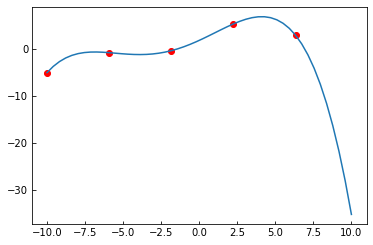

In [12]:
a['X4'] = a.X**4
aall['X4'] = aall.X**4
reg3 = sm.ols(formula='y~ X + X2  + X3 + X4', data = a).fit()
pl.plot(a.X, a.Y, 'ro')
pl.plot(aall.X, reg3.predict(aall))
reg3.summary()

<Container object of 3 artists>

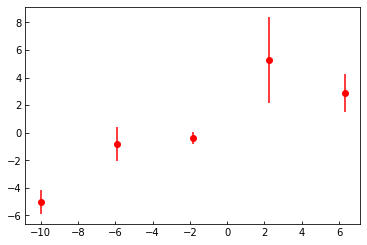

In [13]:

pl.errorbar(x[::10], y, yerr=e, fmt='ro')


In [14]:
def chisq (model, y, e, dof):
    dof = len(y) - dof - 1
    #print ((model - y)**2, dof)
    return sum((model - y)**2 / (e**2))  / dof

0.28690993914535384

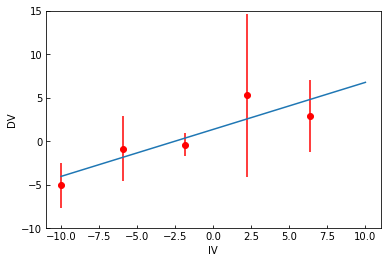

In [15]:
pl.errorbar(x[::10], y, yerr=e*3, fmt='ro')
pl.plot(aall.X, reg0.predict(aall))
pl.xlabel("IV")
pl.ylabel("DV")
pl.ylim(-10,15)
chisq(reg0.predict(a), y, e*3, reg0.df_model)


9.7616298782712505

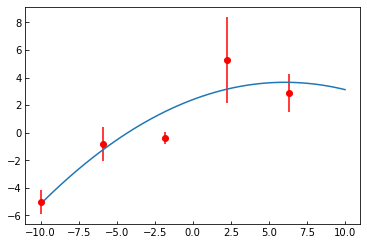

In [16]:
pl.errorbar(x[::10], y, yerr=e, fmt='ro')
pl.plot(aall.X, reg1.predict(aall))
chisq(reg1.predict(a), y, e, reg1.df_model
     )


inf

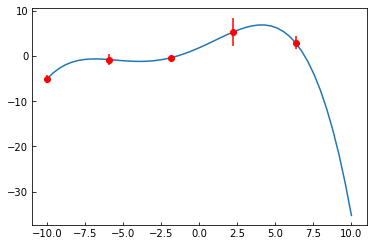

In [17]:
pl.errorbar(x[::10], y, yerr=e, fmt='ro')
pl.plot(aall.X, reg3.predict(aall))
chisq(reg3.predict(a), y, e, reg3.df_model)
